# House Price Prediction: Advanced Regression Techniques

## Description-

Predict the price of a house by it's features. if you are a buyer or seller of the house but you don't know the exact the price of the house , so ML Algorithms can help you to finding the best price of the house just providing features of the target house.

## import essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [2]:
train = pd.read_csv(r'D:\Data Science notes\numpy\dataset\train.csv')
test  = pd.read_csv(r'D:\Data Science notes\numpy\dataset\test.csv')
train.shape,test.shape

((1460, 81), (1459, 80))

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
# show the all columns of dataset and 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#merge datasets
df = pd.concat([train,test],ignore_index=True)
print(df.shape)

(2919, 81)


In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.index

RangeIndex(start=0, stop=2919, step=1)

In [9]:
(df.head(10)).isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  False       False     False        False    False   False   True     False   
1  False       False     False        False    False   False   True     False   
2  False       False     False        False    False   False   True     False   
3  False       False     False        False    False   False   True     False   
4  False       False     False        False    False   False   True     False   
5  False       False     False        False    False   False   True     False   
6  False       False     False        False    False   False   True     False   
7  False       False     False         True    False   False   True     False   
8  False       False     False        False    False   False   True     False   
9  False       False     False        False    False   False   True     False   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0        False      False      False      False         False       False   
1        False      False      False      False         False       False   
2        False      False      False      False         False       False   
3        False      False      False      False         False       False   
4        False      False      False      False         False       False   
5        False      False      False      False         False       False   
6        False      False      False      False         False       False   
7        False      False      False      False         False       False   
8        False      False      False      False         False       False   
9        False      False      False      False         False       False   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       False     False       False        False        False      False   
1       False     False       False        False        False      False   
2       False     False       False        False        False      False   
3       False     False       False        False        False      False   
4       False     False       False        False        False      False   
5       False     False       False        False        False      False   
6       False     False       False        False        False      False   
7       False     False       False        False        False      False   
8       False     False       False        False        False      False   
9       False     False       False        False        False      False   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0         False      False     False        False        False       False   
1         False      False     False        False        False       False   
2         False      False     False        False        False       False   
3         False      False     False        False        False       False   
4         False      False     False        False        False       False   
5         False      False     False        False        False       False   
6         False      False     False        False        False       False   
7         False      False     False        False        False       False   
8         False      False     False        False        False       False   
9         False      False     False        False        False       False   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       False      False      False       False     False     False   
1       False      False      False       False     False     False   
2       False      False      False       False     False     False   
3       False      False      False       False     False     False   
4       False      False      False       False     False     False   
5       False      False      False       False     False     False   
6       False      False      False       False     False     False   
7 

## Exploratory Data Analysis (EDA) And Data Visualization

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
(df.SalePrice).dtype # target column

dtype('float64')

In [12]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [13]:
df_int = df.select_dtypes(include=['int64','float64',]).columns
df_int

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df_obj = df.select_dtypes(include=['object']).columns
df_obj

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
df = df.set_index('Id') # worked only first time because same name define
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ       706.0          Unf         0.0      150.0        856.0   
2           ALQ       978.0          Unf         0.0      284.0       1262.0   
3           GLQ       486.0          Unf         0.0      434.0        920.0   
4           ALQ       216.0          Unf         0.0      540.0        756.0   
5           GLQ       655.0          Unf         0.0      490.0       1145.0   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   
2        1262           0.0           1.0  

<AxesSubplot:ylabel='Id'>

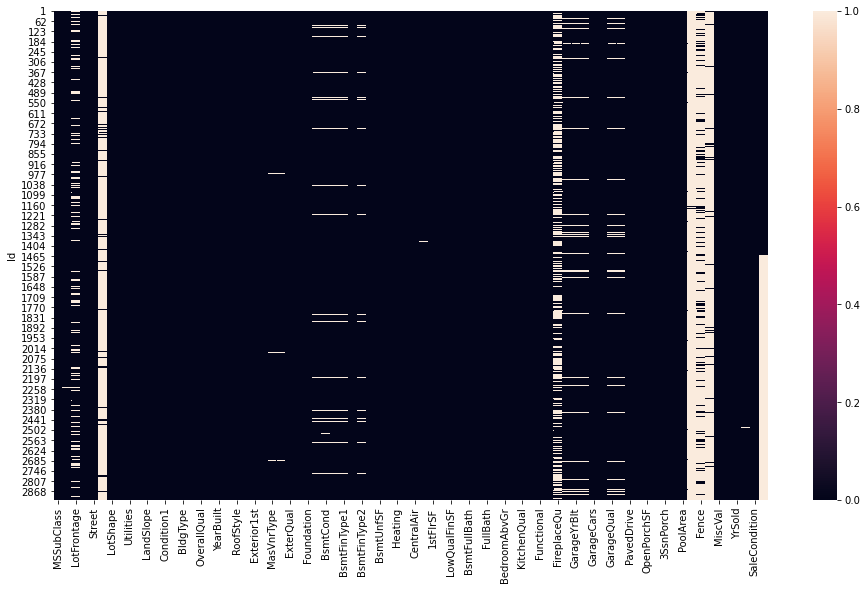

In [16]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [17]:
null_values = df.isnull().sum()/df.shape[0]*100
null_values

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [18]:
df_dropcol = null_values[null_values>20].keys()
df_dropcol

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], dtype='object')

In [19]:
#drop the columns of missing values or null values is greate then 20%
df = df.drop(df_dropcol,'columns')
df.shape

(2919, 74)

In [20]:
df.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                             
1     AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                           
1      2Story            7            5       2003          2003     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                     
1   CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                    
1         TA      PConc       Gd       TA           No          GLQ   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                        
1        706.0          Unf         0.0      150.0        856.0    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                     
1         Ex          Y      SBrkr       856       854             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710           1.0           0.0         2         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
Id                                                                             
1              1          Gd             8        Typ           0     Attchd   

    GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
Id                                                                           
1        2003.0          RFn         2.0       548.0         TA         TA   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                                                                              
1           Y           0           61              0          0            0   

    PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
Id                                                            
1          0        0       2    2008       WD        Normal

In [21]:
df_obj

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# print the unique values of 'obj' columns
for i in df.columns:
    if i in df_obj:
        print(format(i),'=',df[i].unique())

MSZoning = ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street = ['Pave' 'Grvl']
LotShape = ['Reg' 'IR1' 'IR2' 'IR3']
LandContour = ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities = ['AllPub' 'NoSeWa' nan]
LotConfig = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope = ['Gtl' 'Mod' 'Sev']
Neighborhood = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 = ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType = ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle = ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle = ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl = ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st = ['VinylS

In [23]:
(df.MSZoning).describe()

count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object

In [24]:
# its null value counts as a unique value
for i in df.columns:
    print(i + '\t' + str(len(df[i].unique())))

MSSubClass	16
MSZoning	6
LotFrontage	129
LotArea	1951
Street	2
LotShape	4
LandContour	4
Utilities	3
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	118
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	16
Exterior2nd	17
MasVnrType	5
MasVnrArea	445
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	5
BsmtCond	5
BsmtExposure	5
BsmtFinType1	7
BsmtFinSF1	992
BsmtFinType2	7
BsmtFinSF2	273
BsmtUnfSF	1136
TotalBsmtSF	1059
Heating	6
HeatingQC	5
CentralAir	2
Electrical	6
1stFlrSF	1083
2ndFlrSF	635
LowQualFinSF	36
GrLivArea	1292
BsmtFullBath	5
BsmtHalfBath	4
FullBath	5
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	5
TotRmsAbvGrd	14
Functional	8
Fireplaces	5
GarageType	7
GarageYrBlt	104
GarageFinish	4
GarageCars	7
GarageArea	604
GarageQual	6
GarageCond	6
PavedDrive	3
WoodDeckSF	379
OpenPorchSF	252
EnclosedPorch	183
3SsnPorch	31
ScreenPorch	121
PoolArea	14
MiscVal	38
MoSold	12
YrSold	5
SaleType	10
SaleCondition	6


In [25]:
# count's only non-null values
(df['MSZoning'].count())

2915

In [26]:
# unique values for each columns with the total no. of the unique values
for i in df.columns:
    print('unique valu of :>>> {} - ({})\n{}\n'.format(i,len(df[i].unique()),df[i].unique()))

unique valu of :>>> MSSubClass - (16)
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]

unique valu of :>>> MSZoning - (6)
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

unique valu of :>>> LotFrontage - (129)
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]

unique valu of :>>> LotArea - (1951)
[ 8450  9600 11250 ...  1894 20000 10441]

unique valu of :>>> Street - (2)
['Pave' 'Grvl

In [27]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


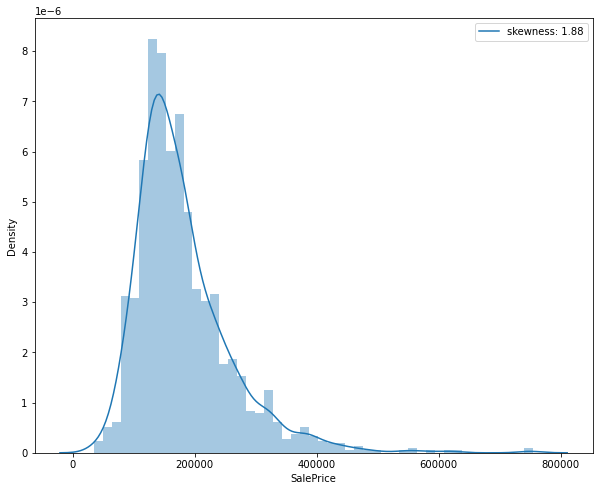

In [28]:
# plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(train['SalePrice'])
bar.legend(["skewness: {:.2f}".format(train['SalePrice'].skew())])

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

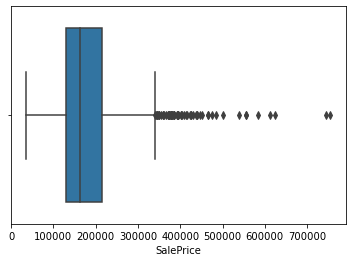

In [29]:
sns.boxplot(train['SalePrice'])

In [30]:
train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

(38.5, -0.5)

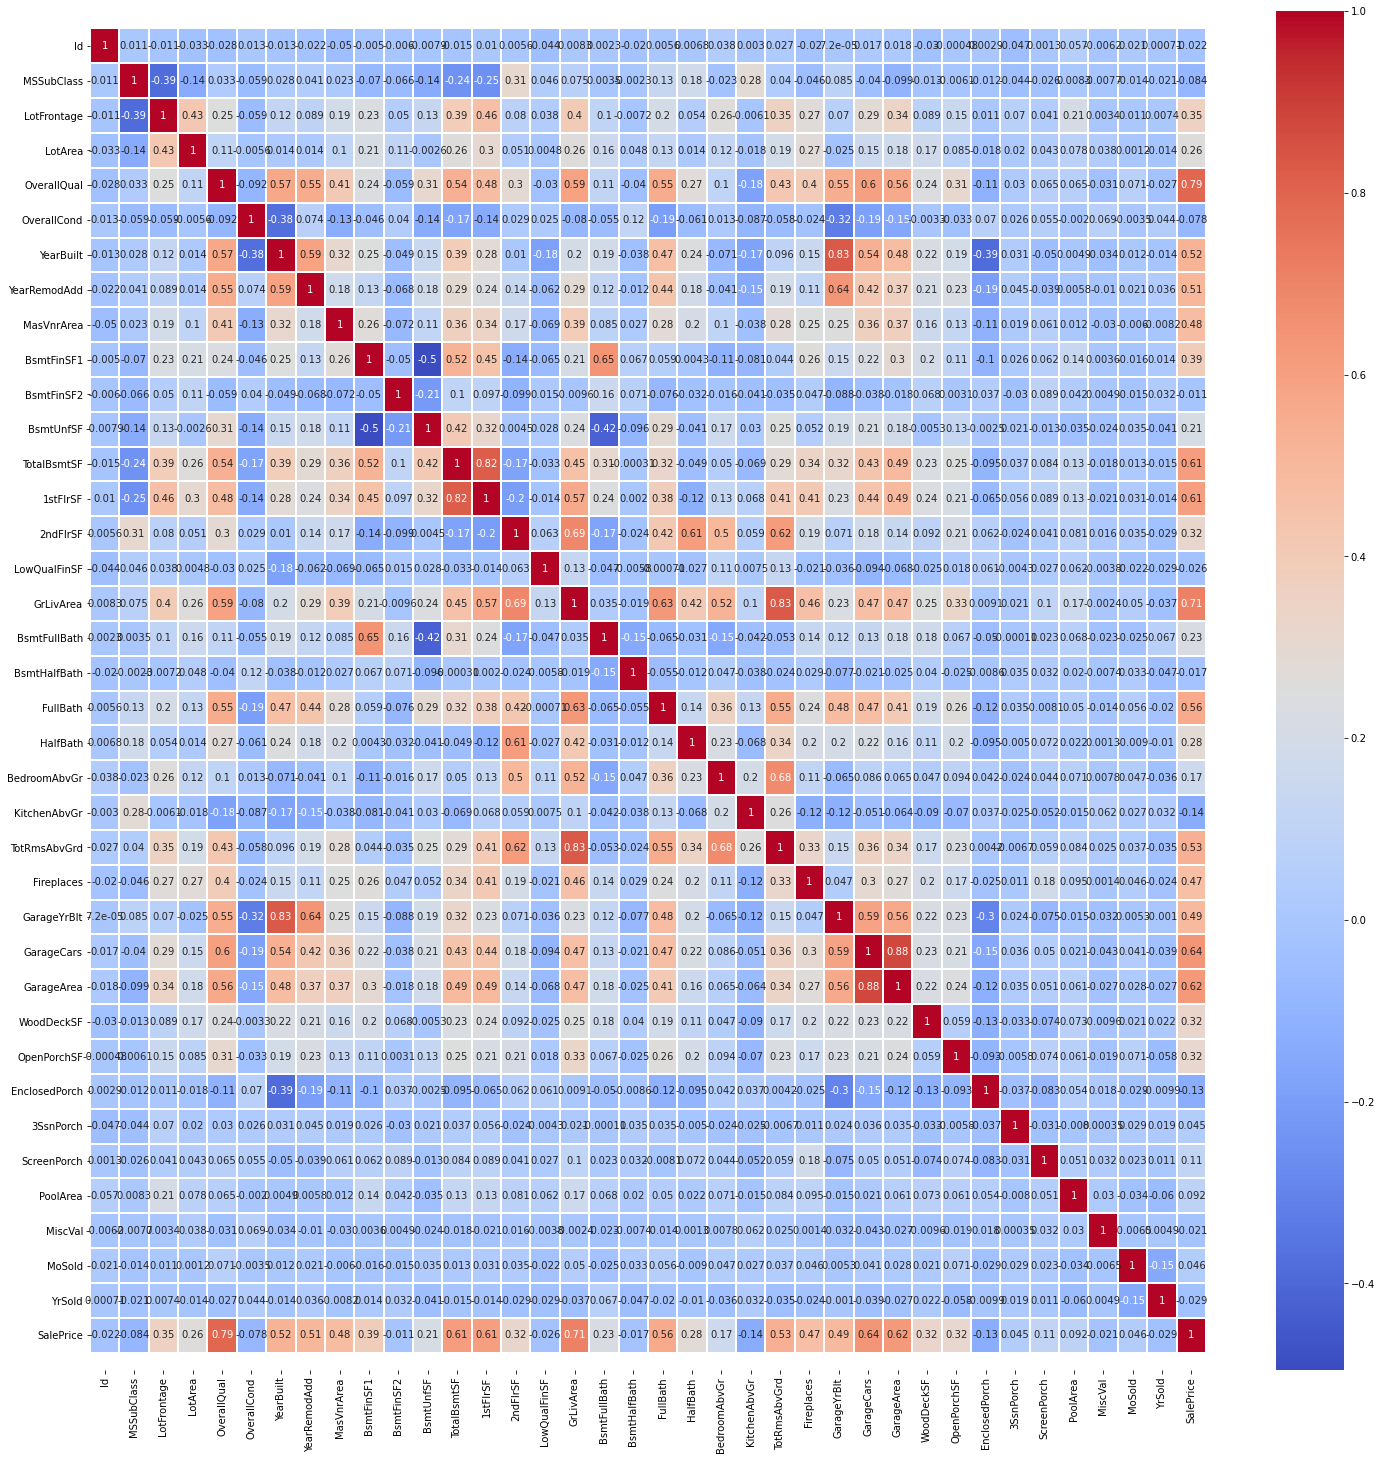

In [31]:
# heatmap plotting for correlation features visualization
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(),cmap='coolwarm',annot=True,linewidth=1)
#  stretch into x or y positions
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

In [32]:
# High correlated features with the saleprice
high_corr = train.corr()
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) >= 0.5]
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

11.0 0.0


(11.0, 0.0)

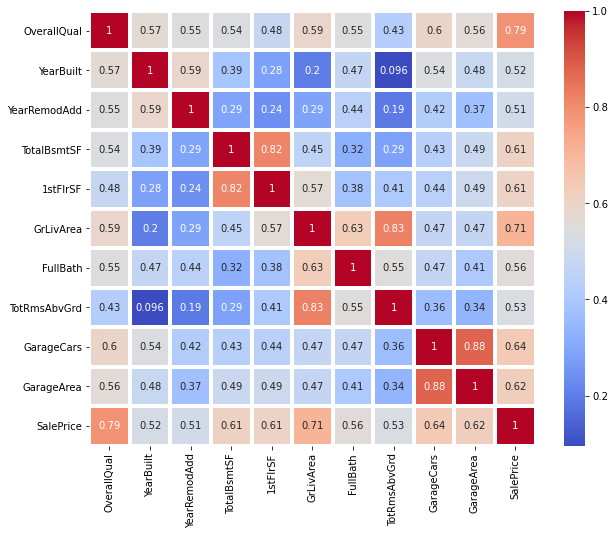

In [33]:
# heatmap of hight corr. features
plt.figure(figsize=(10,8))
ax = sns.heatmap(train[high_corr_features].corr(),cmap='coolwarm',annot=True,linewidth=3)

bottom,top = ax.get_ylim()
print(bottom,top)

ax.set_ylim(bottom,top)

In [34]:
train['FullBath'].corr(other=train['SalePrice'])

0.560663762748446

array([[<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

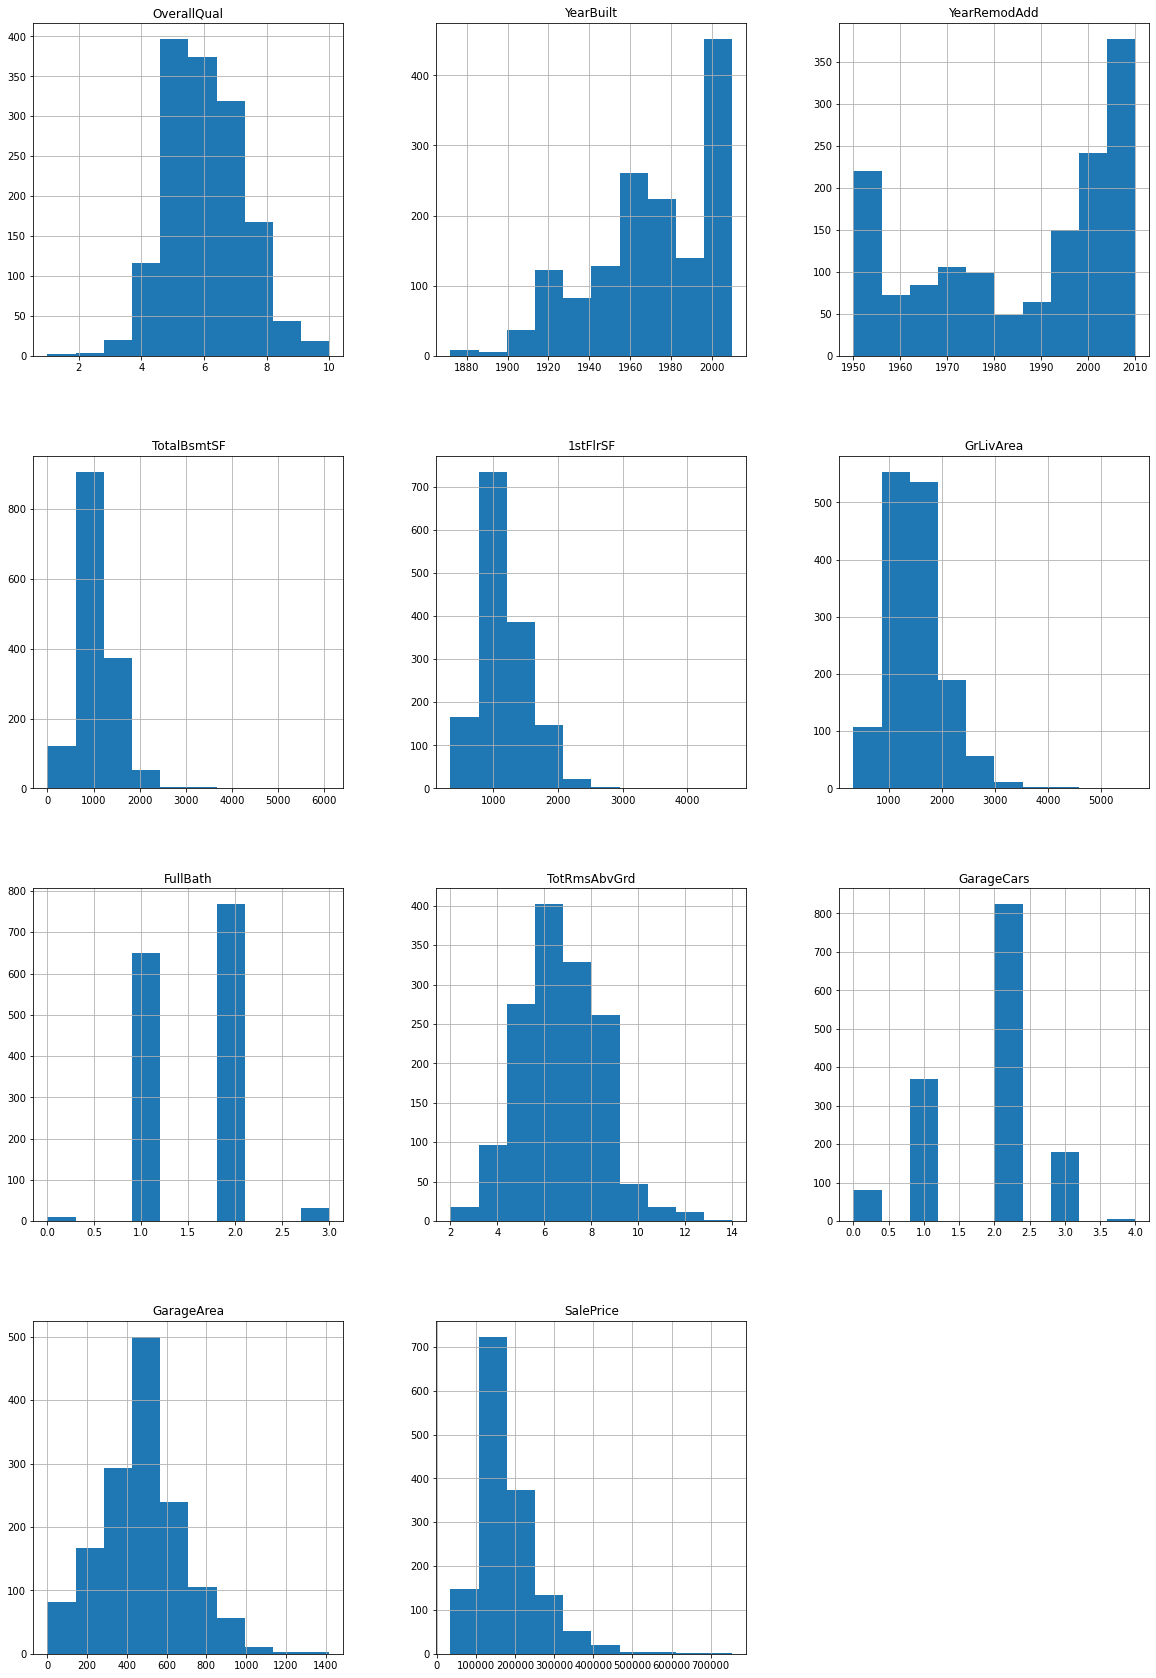

In [35]:
train[high_corr_features].hist(figsize=(20,30))

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

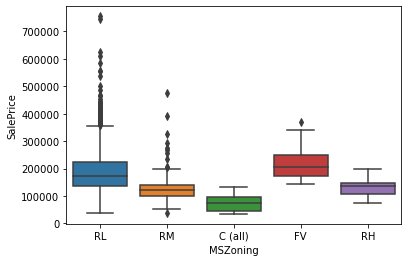

In [36]:
sns.boxplot(x ='MSZoning',y='SalePrice',data=train)

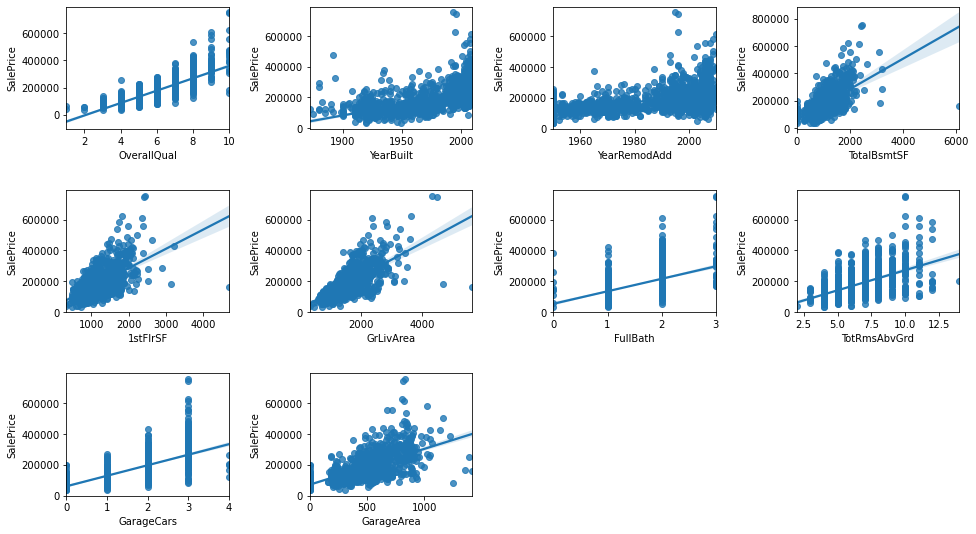

In [37]:
# highest correlated features with saleprice using regplot
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    if i <=9 :
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(data =train, x=high_corr_features[i],y='SalePrice')

## Handling Missing Values

In [38]:
miss_col = df.columns[df.isnull().any()]
miss_col

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [39]:
# total friendly columns calculation and visualization
bsmt_col = []

for i in df.columns:
    if i in miss_col:
        j = str(i)
        if j[0:4] == 'Bsmt' or j[0:9] == 'TotalBsmt':
            if i not in bsmt_col:
                bsmt_col.append(i)
            

In [40]:
len(bsmt_col)

11

In [41]:
bsmt_feat = df[bsmt_col]
bsmt_feat.head()

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                        
1        Gd       TA           No          GLQ       706.0          Unf   
2        Gd       TA           Gd          ALQ       978.0          Unf   
3        Gd       TA           Mn          GLQ       486.0          Unf   
4        TA       Gd           No          ALQ       216.0          Unf   
5        Gd       TA           Av          GLQ       655.0          Unf   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
Id                                                                  
1          0.0      150.0        856.0           1.0           0.0  
2          0.0      284.0       1262.0           0.0           1.0  
3          0.0      434.0        920.0           1.0           0.0  
4          0.0      540.0        756.0           1.0           0.0  
5          0.0      490.0       1145.0           1.0           0.0

In [42]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      2838 non-null   object 
 1   BsmtCond      2837 non-null   object 
 2   BsmtExposure  2837 non-null   object 
 3   BsmtFinType1  2840 non-null   object 
 4   BsmtFinSF1    2918 non-null   float64
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFinSF2    2918 non-null   float64
 7   BsmtUnfSF     2918 non-null   float64
 8   TotalBsmtSF   2918 non-null   float64
 9   BsmtFullBath  2917 non-null   float64
 10  BsmtHalfBath  2917 non-null   float64
dtypes: float64(6), object(5)
memory usage: 216.6+ KB


In [43]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]
bsmt_feat

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                          
18        NaN      NaN          NaN          NaN         0.0          NaN   
40        NaN      NaN          NaN          NaN         0.0          NaN   
91        NaN      NaN          NaN          NaN         0.0          NaN   
103       NaN      NaN          NaN          NaN         0.0          NaN   
157       NaN      NaN          NaN          NaN         0.0          NaN   
183       NaN      NaN          NaN          NaN         0.0          NaN   
260       NaN      NaN          NaN          NaN         0.0          NaN   
333        Gd       TA           No          GLQ      1124.0          NaN   
343       NaN      NaN          NaN          NaN         0.0          NaN   
363       NaN      NaN          NaN          NaN         0.0          NaN   
372       NaN      NaN          NaN          NaN         0.0          NaN   
393       NaN      NaN          NaN          NaN         0.0          NaN   
521       NaN      NaN          NaN          NaN         0.0          NaN   
533       NaN      NaN          NaN          NaN         0.0          NaN   
534       NaN      NaN          NaN          NaN         0.0          NaN   
554       NaN      NaN          NaN          NaN         0.0          NaN   
647       NaN      NaN          NaN          NaN         0.0          NaN   
706       NaN      NaN          NaN          NaN         0.0          NaN   
737       NaN      NaN          NaN          NaN         0.0          NaN   
750       NaN      NaN          NaN          NaN         0.0          NaN   
779       NaN      NaN          NaN          NaN         0.0          NaN   
869       NaN      NaN          NaN          NaN         0.0          NaN   
895       NaN      NaN          NaN          NaN         0.0          NaN   
898       NaN      NaN          NaN          NaN         0.0          NaN   
949        Gd       TA          NaN          Unf         0.0          Unf   
985       NaN      NaN          NaN          NaN         0.0          NaN   
1001      NaN      NaN          NaN          NaN         0.0          NaN   
1012      NaN      NaN          NaN          NaN         0.0          NaN   
1036      NaN      NaN          NaN          NaN         0.0          NaN   
1046      NaN      NaN          NaN          NaN         0.0          NaN   
1049      NaN      NaN          NaN          NaN         0.0          NaN   
1050      NaN      NaN          NaN          NaN         0.0          NaN   
1091      NaN      NaN          NaN          NaN         0.0          NaN   
1180      NaN      NaN          NaN          NaN         0.0          NaN   
1217      NaN      NaN          NaN          NaN         0.0          NaN   
1219      NaN      NaN          NaN          NaN         0.0          NaN   
1233      NaN      NaN          NaN          NaN         0.0          NaN   
1322      NaN      NaN          NaN          NaN         0.0          NaN   
1413      NaN      NaN          NaN          NaN         0.0          NaN   
1488       Gd       TA          NaN          Unf         0.0          Unf   
1586      NaN      NaN          NaN          NaN         0.0          NaN   
1594      NaN      NaN          NaN          NaN         0.0          NaN   
1730      NaN      NaN          NaN          NaN         0.0          NaN   
1779      NaN      NaN          NaN          NaN         0.0          NaN   
1815      NaN      NaN          NaN          NaN         0.0          NaN   
1848      NaN      NaN          NaN          NaN         0.0          NaN   
1849      NaN      NaN          NaN          NaN         0.0          NaN   
1857      NaN      NaN          NaN          NaN         0.0          NaN   
1858      NaN      NaN          NaN          NaN         0.0          NaN   
1859      NaN      NaN          NaN          NaN         0.0          NaN   
1

In [44]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull() | bsmt_feat.isin([0])).all(1)]
bsmt_feat_all_nan

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                          
18        NaN      NaN          NaN          NaN         0.0          NaN   
40        NaN      NaN          NaN          NaN         0.0          NaN   
91        NaN      NaN          NaN          NaN         0.0          NaN   
103       NaN      NaN          NaN          NaN         0.0          NaN   
157       NaN      NaN          NaN          NaN         0.0          NaN   
183       NaN      NaN          NaN          NaN         0.0          NaN   
260       NaN      NaN          NaN          NaN         0.0          NaN   
343       NaN      NaN          NaN          NaN         0.0          NaN   
363       NaN      NaN          NaN          NaN         0.0          NaN   
372       NaN      NaN          NaN          NaN         0.0          NaN   
393       NaN      NaN          NaN          NaN         0.0          NaN   
521       NaN      NaN          NaN          NaN         0.0          NaN   
533       NaN      NaN          NaN          NaN         0.0          NaN   
534       NaN      NaN          NaN          NaN         0.0          NaN   
554       NaN      NaN          NaN          NaN         0.0          NaN   
647       NaN      NaN          NaN          NaN         0.0          NaN   
706       NaN      NaN          NaN          NaN         0.0          NaN   
737       NaN      NaN          NaN          NaN         0.0          NaN   
750       NaN      NaN          NaN          NaN         0.0          NaN   
779       NaN      NaN          NaN          NaN         0.0          NaN   
869       NaN      NaN          NaN          NaN         0.0          NaN   
895       NaN      NaN          NaN          NaN         0.0          NaN   
898       NaN      NaN          NaN          NaN         0.0          NaN   
985       NaN      NaN          NaN          NaN         0.0          NaN   
1001      NaN      NaN          NaN          NaN         0.0          NaN   
1012      NaN      NaN          NaN          NaN         0.0          NaN   
1036      NaN      NaN          NaN          NaN         0.0          NaN   
1046      NaN      NaN          NaN          NaN         0.0          NaN   
1049      NaN      NaN          NaN          NaN         0.0          NaN   
1050      NaN      NaN          NaN          NaN         0.0          NaN   
1091      NaN      NaN          NaN          NaN         0.0          NaN   
1180      NaN      NaN          NaN          NaN         0.0          NaN   
1217      NaN      NaN          NaN          NaN         0.0          NaN   
1219      NaN      NaN          NaN          NaN         0.0          NaN   
1233      NaN      NaN          NaN          NaN         0.0          NaN   
1322      NaN      NaN          NaN          NaN         0.0          NaN   
1413      NaN      NaN          NaN          NaN         0.0          NaN   
1586      NaN      NaN          NaN          NaN         0.0          NaN   
1594      NaN      NaN          NaN          NaN         0.0          NaN   
1730      NaN      NaN          NaN          NaN         0.0          NaN   
1779      NaN      NaN          NaN          NaN         0.0          NaN   
1815      NaN      NaN          NaN          NaN         0.0          NaN   
1848      NaN      NaN          NaN          NaN         0.0          NaN   
1849      NaN      NaN          NaN          NaN         0.0          NaN   
1857      NaN      NaN          NaN          NaN         0.0          NaN   
1858      NaN      NaN          NaN          NaN         0.0          NaN   
1859      NaN      NaN          NaN          NaN         0.0          NaN   
1861      NaN      NaN          NaN          NaN         0.0          NaN   
1916      NaN      NaN          NaN          NaN         0.0          NaN   
2051      NaN      NaN          NaN          NaN         0.0          NaN   
2

In [45]:
bsmt_feat.shape

(88, 11)

In [46]:
qual = list(df.loc[:,df.dtypes == 'object'].columns.values)
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [47]:
# fill of the missing values in bsmt features
for i in bsmt_col:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA') #replace the nan value
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)

bsmt_feat.update(bsmt_feat_all_nan)
df.update(bsmt_feat_all_nan)

<ipython-input-47-a39df62960a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA') #replace the nan value
<ipython-input-47-a39df62960a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)


In [48]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]
bsmt_feat

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                          
333        Gd       TA           No          GLQ      1124.0          NaN   
949        Gd       TA          NaN          Unf         0.0          Unf   
1488       Gd       TA          NaN          Unf         0.0          Unf   
2041       Gd      NaN           Mn          GLQ      1044.0          Rec   
2186       TA      NaN           No          BLQ      1033.0          Unf   
2218      NaN       Fa           No          Unf         0.0          Unf   
2219      NaN       TA           No          Unf         0.0          Unf   
2349       Gd       TA          NaN          Unf         0.0          Unf   
2525       TA      NaN           Av          ALQ       755.0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
Id                                                                    
333        479.0     1603.0       3206.0           1.0           0.0  
949          0.0      936.0        936.0           0.0           0.0  
1488         0.0     1595.0       1595.0           0.0           0.0  
2041       382.0        0.0       1426.0           1.0           0.0  
2186         0.0       94.0       1127.0           0.0           1.0  
2218         0.0      173.0        173.0           0.0           0.0  
2219         0.0      356.0        356.0           0.0           0.0  
2349         0.0      725.0        725.0           0.0           0.0  
2525         0.0      240.0        995.0           0.0           0.0

In [49]:
bsmt_feat.shape

(9, 11)

In [50]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [51]:
pd.cut(range(0,1526),5) #create a bucket

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [52]:
df_slice = df[df['BsmtFinSF2'] >= 305 & (df['BsmtFinSF2'] <= 610)]
df_slice

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
8             60       RL          NaN    10382   Pave      IR1         Lvl   
25            20       RL          NaN     8246   Pave      IR1         Lvl   
27            20       RL         60.0     7200   Pave      Reg         Lvl   
43            85       RL          NaN     9180   Pave      IR1         Lvl   
44            20       RL          NaN     9200   Pave      IR1         Lvl   
45            20       RL         70.0     7945   Pave      Reg         Lvl   
53            90       RM        110.0     8472   Grvl      IR2         Bnk   
74            20       RL         85.0    10200   Pave      Reg         Lvl   
78            50       RM         50.0     8635   Pave      Reg         Lvl   
108           20       RM         50.0     6000   Pave      Reg         Lvl   
114           20       RL          NaN    21000   Pave      Reg         Bnk   
115           70       RL         61.0     7259   Pave      IR1         Lvl   
117           20       RL          NaN    11616   Pave      Reg         Lvl   
130           20       RL         69.0     8973   Pave      Reg         Lvl   
154           20       RL          NaN    13500   Pave      Reg         Lvl   
166          190       RL         62.0    10106   Pave      Reg         Lvl   
167           20       RL          NaN    10708   Pave      IR1         Lvl   
173          160       RL         44.0     5306   Pave      IR1         Lvl   
174           20       RL         80.0    10197   Pave      IR1         Lvl   
175           20       RL         47.0    12416   Pave      IR1         Lvl   
178           50       RL          NaN    13650   Pave      Reg         Lvl   
198           75       RL        174.0    25419   Pave      Reg         Lvl   
202           20       RL         75.0    10125   Pave      Reg         Lvl   
208           20       RL          NaN    12493   Pave      IR1         Lvl   
224           20       RL         70.0    10500   Pave      Reg         Lvl   
234           20       RL         75.0    10650   Pave      Reg         Lvl   
254           80       RL         85.0     9350   Pave      Reg         Lvl   
261           80       RL        120.0    19296   Pave      Reg         Lvl   
264           50       RM         50.0     5500   Pave      Reg         Lvl   
266           20       RL         78.0    12090   Pave      IR1         Lvl   
269           30       RM         71.0     6900   Pave      Reg         Lvl   
272           20       RL         73.0    39104   Pave      IR1         Low   
274           20       RL         80.0     9600   Pave      Reg         Lvl   
299           60       RL         90.0    11700   Pave      Reg         Lvl   
314           20       RL        150.0   215245   Pave      IR3         Low   
323           60       RL         86.0    10380   Pave      IR1         Lvl   
331           90       RL          NaN    10624   Pave      IR1         Lvl   
333           20       RL         85.0    10655   Pave      IR1         Lvl   
336          190       RL          NaN   164660   Grvl      IR1         HLS   
345          160       RM         36.0     2592   Pave      Reg         Lvl   
353           50       RL         60.0     9084   Pave      Reg         Lvl   
356           20       RL        105.0    11249   Pave      IR2         Lvl   
359           80       RL         92.0     6930   Pave      IR1         Lvl   
370           20       RL          NaN     9830   Pave      IR1         Lvl   
373          120       RL         50.0     7175   Pave      Reg         Lvl   
374           20       RL         79.0    10634   Pave      Reg         Lvl   
391           50       RL         50.0     8405   Pave      Reg         Lvl   
415           60       RL         59.0    11228   Pave      IR2         Lvl   
436           60       RL         43.0    10667   Pave  

In [53]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0]  #replace nan value of bsmtfin

In [54]:
bsmt_feat

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                          
333        Gd       TA           No          GLQ      1124.0          Rec   
949        Gd       TA          NaN          Unf         0.0          Unf   
1488       Gd       TA          NaN          Unf         0.0          Unf   
2041       Gd      NaN           Mn          GLQ      1044.0          Rec   
2186       TA      NaN           No          BLQ      1033.0          Unf   
2218      NaN       Fa           No          Unf         0.0          Unf   
2219      NaN       TA           No          Unf         0.0          Unf   
2349       Gd       TA          NaN          Unf         0.0          Unf   
2525       TA      NaN           Av          ALQ       755.0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
Id                                                                    
333        479.0     1603.0       3206.0           1.0           0.0  
949          0.0      936.0        936.0           0.0           0.0  
1488         0.0     1595.0       1595.0           0.0           0.0  
2041       382.0        0.0       1426.0           1.0           0.0  
2186         0.0       94.0       1127.0           0.0           1.0  
2218         0.0      173.0        173.0           0.0           0.0  
2219         0.0      356.0        356.0           0.0           0.0  
2349         0.0      725.0        725.0           0.0           0.0  
2525         0.0      240.0        995.0           0.0           0.0

In [55]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan,df[df['BsmtQual']=='Gd']['BsmtExposure'].mode()[0])

<ipython-input-55-d2b1c7eff7b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan,df[df['BsmtQual']=='Gd']['BsmtExposure'].mode()[0])


In [56]:
bsmt_feat['TotalBsmtSF'].unique()

array([3206.,  936., 1595., 1426., 1127.,  173.,  356.,  725.,  995.])

In [57]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0])
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0])

bsmt_feat['TotalBsmtSF'] = bsmt_feat['TotalBsmtSF'].fillna(bsmt_feat['TotalBsmtSF'].mode()[0])

<ipython-input-57-3412083f223a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0])
<ipython-input-57-3412083f223a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0])
<ipython-input-57-3412083f223a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [58]:
# applying bsmt feature in the dataframe
df.update(bsmt_feat)

In [59]:
bsmt_feat.isnull().sum().sum()

0

#### handling missing values of garage feature

In [60]:
miss_col2 = df.columns[df.isnull().any()]
miss_col2

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [61]:
# total friendly columns calculation and visualization
grg_col = []

for i in df.columns:
    if i in miss_col2:
        j = str(i)
        if j[0:6] == 'Garage':
            if i not in grg_col:
                grg_col.append(i)
grg_col

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [62]:
grg_feat = df[grg_col]
grg_feat = grg_feat[grg_feat.isnull().any(axis=1)]
grg_feat

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                             
40          NaN          NaN          NaN         0.0         0.0        NaN   
49          NaN          NaN          NaN         0.0         0.0        NaN   
79          NaN          NaN          NaN         0.0         0.0        NaN   
89          NaN          NaN          NaN         0.0         0.0        NaN   
90          NaN          NaN          NaN         0.0         0.0        NaN   
100         NaN          NaN          NaN         0.0         0.0        NaN   
109         NaN          NaN          NaN         0.0         0.0        NaN   
126         NaN          NaN          NaN         0.0         0.0        NaN   
128         NaN          NaN          NaN         0.0         0.0        NaN   
141         NaN          NaN          NaN         0.0         0.0        NaN   
149         NaN          NaN          NaN         0.0         0.0        NaN   
156         NaN          NaN          NaN         0.0         0.0        NaN   
164         NaN          NaN          NaN         0.0         0.0        NaN   
166         NaN          NaN          NaN         0.0         0.0        NaN   
199         NaN          NaN          NaN         0.0         0.0        NaN   
211         NaN          NaN          NaN         0.0         0.0        NaN   
242         NaN          NaN          NaN         0.0         0.0        NaN   
251         NaN          NaN          NaN         0.0         0.0        NaN   
288         NaN          NaN          NaN         0.0         0.0        NaN   
292         NaN          NaN          NaN         0.0         0.0        NaN   
308         NaN          NaN          NaN         0.0         0.0        NaN   
376         NaN          NaN          NaN         0.0         0.0        NaN   
387         NaN          NaN          NaN         0.0         0.0        NaN   
394         NaN          NaN          NaN         0.0         0.0        NaN   
432         NaN          NaN          NaN         0.0         0.0        NaN   
435         NaN          NaN          NaN         0.0         0.0        NaN   
442         NaN          NaN          NaN         0.0         0.0        NaN   
465         NaN          NaN          NaN         0.0         0.0        NaN   
496         NaN          NaN          NaN         0.0         0.0        NaN   
521         NaN          NaN          NaN         0.0         0.0        NaN   
529         NaN          NaN          NaN         0.0         0.0        NaN   
534         NaN          NaN          NaN         0.0         0.0        NaN   
536         NaN          NaN          NaN         0.0         0.0        NaN   
563         NaN          NaN          NaN         0.0         0.0        NaN   
583         NaN          NaN          NaN         0.0         0.0        NaN   
614         NaN          NaN          NaN         0.0         0.0        NaN   
615         NaN          NaN          NaN         0.0         0.0        NaN   
621         NaN          NaN          NaN         0.0         0.0        NaN   
636         NaN          NaN          NaN         0.0         0.0        NaN   
637         NaN          NaN          NaN         0.0         0.0        NaN   
639         NaN          NaN          NaN         0.0         0.0        NaN   
650         NaN          NaN          NaN         0.0         0.0        NaN   
706         NaN          NaN          NaN         0.0         0.0        NaN   
711         NaN          NaN          NaN         0.0         0.0        NaN   
739         NaN          NaN          NaN         0.0         0.0        NaN   
751         NaN          NaN          NaN         0.0         0.0        NaN   
785         NaN          NaN          NaN         0.0         0.0        NaN   
827         NaN          NaN          NaN         0.0         0.0        NaN   
844  

In [63]:
for i in grg_col:
    grg_feat[i] = grg_feat[i].replace(np.nan,df[df['GarageType']== 'Detchd'][i].mode()[0])

In [64]:
grg_feat.isnull().any()

GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool

In [65]:
 df.update(grg_feat)

#### handling missing values of remain feature

In [66]:
miss_col3 = df.columns[df.isnull().any()]
miss_col3

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional',
       'SaleType'],
      dtype='object')

In [67]:
df[miss_col3].isnull().sum()

MSZoning         4
LotFrontage    486
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
MasVnrArea      23
Electrical       1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64

In [68]:
df['MasVnrArea'].describe(include='all')

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [69]:
# after each columns visulization filling nan values
for i in miss_col3:
    if df[i].dtype != float:
        df[i] = df[i].fillna(df[i].mode()[0])

In [70]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [71]:
df[df['MasVnrArea'].isnull() == True]['MasVnrType'].unique()

array(['None'], dtype=object)

In [72]:
df.loc[(df['MasVnrType'] =='None') & (df['MasVnrArea'].isnull() == True),'MasVnrArea'] = 0

In [73]:
df.isnull().sum()/df.shape[0] * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

#### missing value of LotFrantage Feature

In [74]:
df['LotFrontage'].describe(include='all')

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [75]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [76]:
df["LotFrontage"].isnull().sum()

0

In [77]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# Feature Transformation

In [78]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [79]:
# convert columns into str which have categorical type data but in in64
year_convert_dtype = ['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in year_convert_dtype:
    df[i] = df[i].astype(str)

In [80]:
df['MoSold'].unique() # mosold = month of sold

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [81]:
# observe in month and convert
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [82]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [83]:
# int or floating point columns
int_col = list(df.loc[:,df.dtypes != 'object'].columns.values)
int_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [84]:
len(int_col)

30

In [85]:
# object type columns
obj_col = list(df.loc[:,df.dtypes == 'object'].columns.values)
obj_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [86]:
len(obj_col)

44

#### convert categorical values into order

In [87]:
from pandas.api.types import CategoricalDtype

df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [88]:
# contverted obj type data in integer format with categorewise
b_features = ['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','Functional','GarageCond',
              'GarageQual','GarageFinish','HeatingQC','KitchenQual','PavedDrive','Utilities']
for i in b_features:
    print('Unique Value of "({})" : {}'.format(i,df[i].unique()))
    df[i] = df[i].astype(CategoricalDtype(categories=df[i].unique(),ordered=True)).cat.codes
    print('Unique Value of Converted Data "({})" : {}\n'.format(i,df[i].unique()))
print('Unique Value of "({})" : {}'.format('BsmtCond',train['BsmtCond'].unique()))
print('Unique Value of Converted Data "({})" : {}'.format('BsmtCond',df['BsmtCond'].unique()))

Unique Value of "(BsmtExposure)" : ['No' 'Gd' 'Mn' 'Av' 'NA']
Unique Value of Converted Data "(BsmtExposure)" : [0 1 2 3 4]

Unique Value of "(BsmtFinType1)" : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
Unique Value of Converted Data "(BsmtFinType1)" : [0 1 2 3 4 5 6]

Unique Value of "(BsmtFinType2)" : ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique Value of Converted Data "(BsmtFinType2)" : [0 1 2 3 4 5 6]

Unique Value of "(BsmtQual)" : ['Gd' 'TA' 'Ex' 'NA' 'Fa']
Unique Value of Converted Data "(BsmtQual)" : [0 1 2 3 4]

Unique Value of "(ExterQual)" : ['Gd' 'TA' 'Ex' 'Fa']
Unique Value of Converted Data "(ExterQual)" : [0 1 2 3]

Unique Value of "(ExterCond)" : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique Value of Converted Data "(ExterCond)" : [0 1 2 3 4]

Unique Value of "(Functional)" : ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Unique Value of Converted Data "(Functional)" : [0 1 2 3 4 5 6]

Unique Value of "(GarageCond)" : ['TA' 'Fa' 'Gd' 'Po' 'Ex']
Unique Value of Converted Data 

In [89]:
df[obj_col].dtypes

MSSubClass       object
MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities          int8
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
YearBuilt        object
YearRemodAdd     object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual          int8
ExterCond          int8
Foundation       object
BsmtQual           int8
BsmtCond           int8
BsmtExposure       int8
BsmtFinType1       int8
BsmtFinType2       int8
Heating          object
HeatingQC          int8
CentralAir       object
Electrical       object
KitchenQual        int8
Functional         int8
GarageType       object
GarageYrBlt      object
GarageFinish       int8
GarageQual         int8
GarageCond         int8
PavedDrive         int8
MoSold           object
YrSold          

In [90]:
df['MSSubClass'].unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40', '150'], dtype=object)

#### Show Skewness of features  with the help of displot

In [91]:
skewed_features = int_col
skewed_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

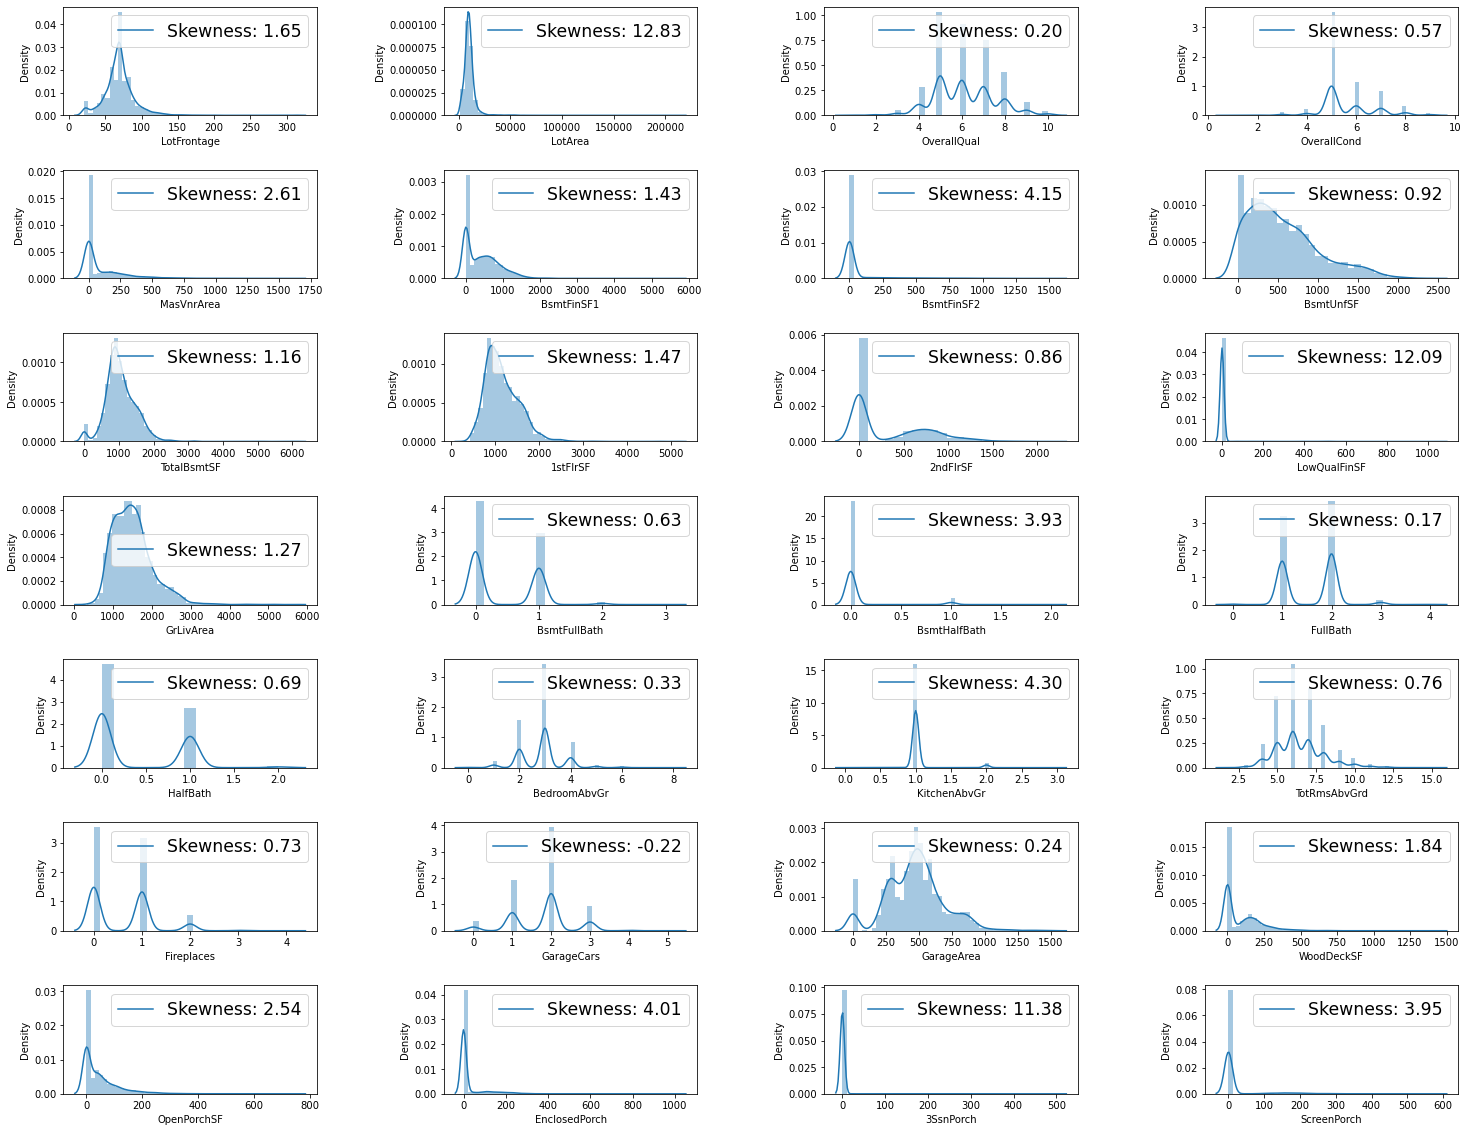

In [92]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i < 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [93]:
# decrease the skewness of the data
for i in skewed_features:
    df[i] = np.log(df[i]+1)
    print(np.log(df[i]+1))

Id
1       1.646667
2       1.685370
3       1.655196
4       1.631370
5       1.694266
6       1.696413
7       1.673489
8       1.658772
9       1.599639
10      1.595709
11      1.660640
12      1.696413
13      1.658772
14      1.708702
15      1.658772
16      1.599639
17      1.658772
18      1.665905
19      1.649561
20      1.660640
21      1.727216
22      1.621454
23      1.673489
24      1.570003
25      1.658772
26      1.742137
27      1.631370
28      1.721895
29      1.583341
30      1.631370
31      1.595709
32      1.658772
33      1.696413
34      1.660640
35      1.631370
36      1.738947
37      1.745260
38      1.671001
39      1.655196
40      1.646667
41      1.694266
42      1.749824
43      1.658772
44      1.658772
45      1.660640
46      1.634547
47      1.587564
48      1.694266
49      1.509918
50      1.649561
51      1.658772
52      1.603479
53      1.742137
54      1.655196
55      1.631370
56      1.725463
57      1.439569
58      1.704713
59      1.6

Id
1       1.837880
2       0.000000
3       1.807264
4       0.000000
5       1.925822
6       0.000000
7       1.829554
8       1.869461
9       0.000000
10      0.000000
11      0.000000
12      1.896042
13      0.000000
14      1.906107
15      1.850232
16      0.000000
17      1.824307
18      0.000000
19      0.000000
20      0.000000
21      1.937705
22      0.000000
23      1.893399
24      0.000000
25      0.000000
26      2.009961
27      0.000000
28      1.841074
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      1.873245
36      1.773315
37      0.000000
38      2.012034
39      0.000000
40      0.000000
41      1.727216
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      1.949254
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      1.888504
57      1.963565
58      0.000000
59      2.0

Name: BsmtUnfSF, dtype: float64
Id
1       2.048136
2       2.096943
3       2.057383
4       2.032004
5       2.084931
6       2.038731
7       2.131881
8       2.080730
9       2.061738
10      2.066828
11      2.072912
12      2.088138
13      2.056267
14      2.117445
15      2.096064
16      2.044466
17      2.068474
18      0.000000
19      2.081516
20      2.071575
21      2.086332
22      2.009333
23      2.138093
24      2.072912
25      2.075304
26      2.123090
27      2.054573
28      2.133139
29      2.116637
30      1.981794
31      2.011828
32      2.093586
33      2.094186
34      2.109427
35      2.122707
36      2.081851
37      2.079597
38      2.100295
39      2.074948
40      0.000000
41      2.078568
42      2.105182
43      2.045703
44      2.059853
45      2.085472
46      2.136422
47      2.112504
48      2.129750
49      2.028489
50      2.062137
51      2.038404
52      2.041952
53      2.041952
54      2.142317
55      1.939208
56      2.111743
57      2.064

Id
1       2.047835
2       0.000000
3       2.049631
4       2.032004
5       2.074473
6       1.993388
7       0.000000
8       2.065802
9       2.031310
10      0.000000
11      0.000000
12      2.084605
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      2.092578
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      2.015674
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      2.102443
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      2.008065
48      0.000000
49      2.024863
50      0.000000
51      2.017256
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      2.032004
58      2.048737
59      2.1

Id
1       2.133555
2       2.096943
3       2.138688
4       2.134038
5       2.162835
6       2.106259
7       2.132442
8       2.157027
9       2.137894
10      2.077297
11      2.072912
12      2.169222
13      2.056267
14      2.117445
15      2.096064
16      2.047835
17      2.068474
18      2.100201
19      2.081516
20      2.104186
21      2.171747
22      2.080842
23      2.139280
24      2.075304
25      2.075304
26      2.125655
27      2.054573
28      2.133139
29      2.125655
30      1.981794
31      2.102165
32      2.093586
33      2.094186
34      2.132860
35      2.122707
36      2.175327
37      2.079597
38      2.100295
39      2.074948
40      2.085687
41      2.102812
42      2.103180
43      2.052274
44      2.059853
45      2.085472
46      2.136422
47      2.160240
48      2.129750
49      2.114010
50      2.062137
51      2.115496
52      2.088243
53      2.041952
54      2.142317
55      2.106080
56      2.111743
57      2.135543
58      2.134245
59      2.1

Name: FullBath, dtype: float64
Id
1       0.526589
2       0.000000
3       0.526589
4       0.000000
5       0.526589
6       0.526589
7       0.000000
8       0.526589
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.526589
16      0.000000
17      0.000000
18      0.000000
19      0.526589
20      0.000000
21      0.526589
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.526589
33      0.000000
34      0.526589
35      0.000000
36      0.526589
37      0.526589
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.526589
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.526589
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.526589
55      0.000000
56      0.000000
57      0.5265

Id
1       0.526589
2       0.526589
3       0.526589
4       0.526589
5       0.526589
6       0.526589
7       0.526589
8       0.526589
9       0.741276
10      0.741276
11      0.526589
12      0.526589
13      0.526589
14      0.526589
15      0.526589
16      0.526589
17      0.526589
18      0.741276
19      0.526589
20      0.526589
21      0.526589
22      0.526589
23      0.526589
24      0.526589
25      0.526589
26      0.526589
27      0.526589
28      0.526589
29      0.526589
30      0.526589
31      0.526589
32      0.526589
33      0.526589
34      0.526589
35      0.526589
36      0.526589
37      0.526589
38      0.526589
39      0.526589
40      0.741276
41      0.526589
42      0.526589
43      0.526589
44      0.526589
45      0.526589
46      0.526589
47      0.526589
48      0.526589
49      0.869742
50      0.526589
51      0.526589
52      0.526589
53      0.526589
54      0.526589
55      0.526589
56      0.526589
57      0.526589
58      0.526589
59      0.5

Id
1       0.741276
2       0.741276
3       0.741276
4       0.869742
5       0.869742
6       0.741276
7       0.741276
8       0.741276
9       0.741276
10      0.526589
11      0.526589
12      0.869742
13      0.526589
14      0.869742
15      0.526589
16      0.741276
17      0.741276
18      0.741276
19      0.741276
20      0.526589
21      0.869742
22      0.526589
23      0.741276
24      0.741276
25      0.526589
26      0.869742
27      0.741276
28      0.869742
29      0.526589
30      0.526589
31      0.526589
32      0.526589
33      0.741276
34      0.741276
35      0.741276
36      0.869742
37      0.741276
38      0.741276
39      0.526589
40      0.000000
41      0.741276
42      0.526589
43      0.741276
44      0.526589
45      0.526589
46      0.741276
47      0.741276
48      0.869742
49      0.000000
50      0.526589
51      0.741276
52      0.741276
53      0.741276
54      0.869742
55      0.741276
56      0.741276
57      0.741276
58      0.741276
59      0.8

Name: OpenPorchSF, dtype: float64
Id
1       0.000000
2       0.000000
3       0.000000
4       1.888504
5       0.000000
6       0.000000
7       0.000000
8       1.861553
9       1.844965
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      1.820695
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      1.844965
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      1.700619
31      1.816987
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      1.728949
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.0

Id
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      1.820695
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      1.839486
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.000000
59      0.0

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

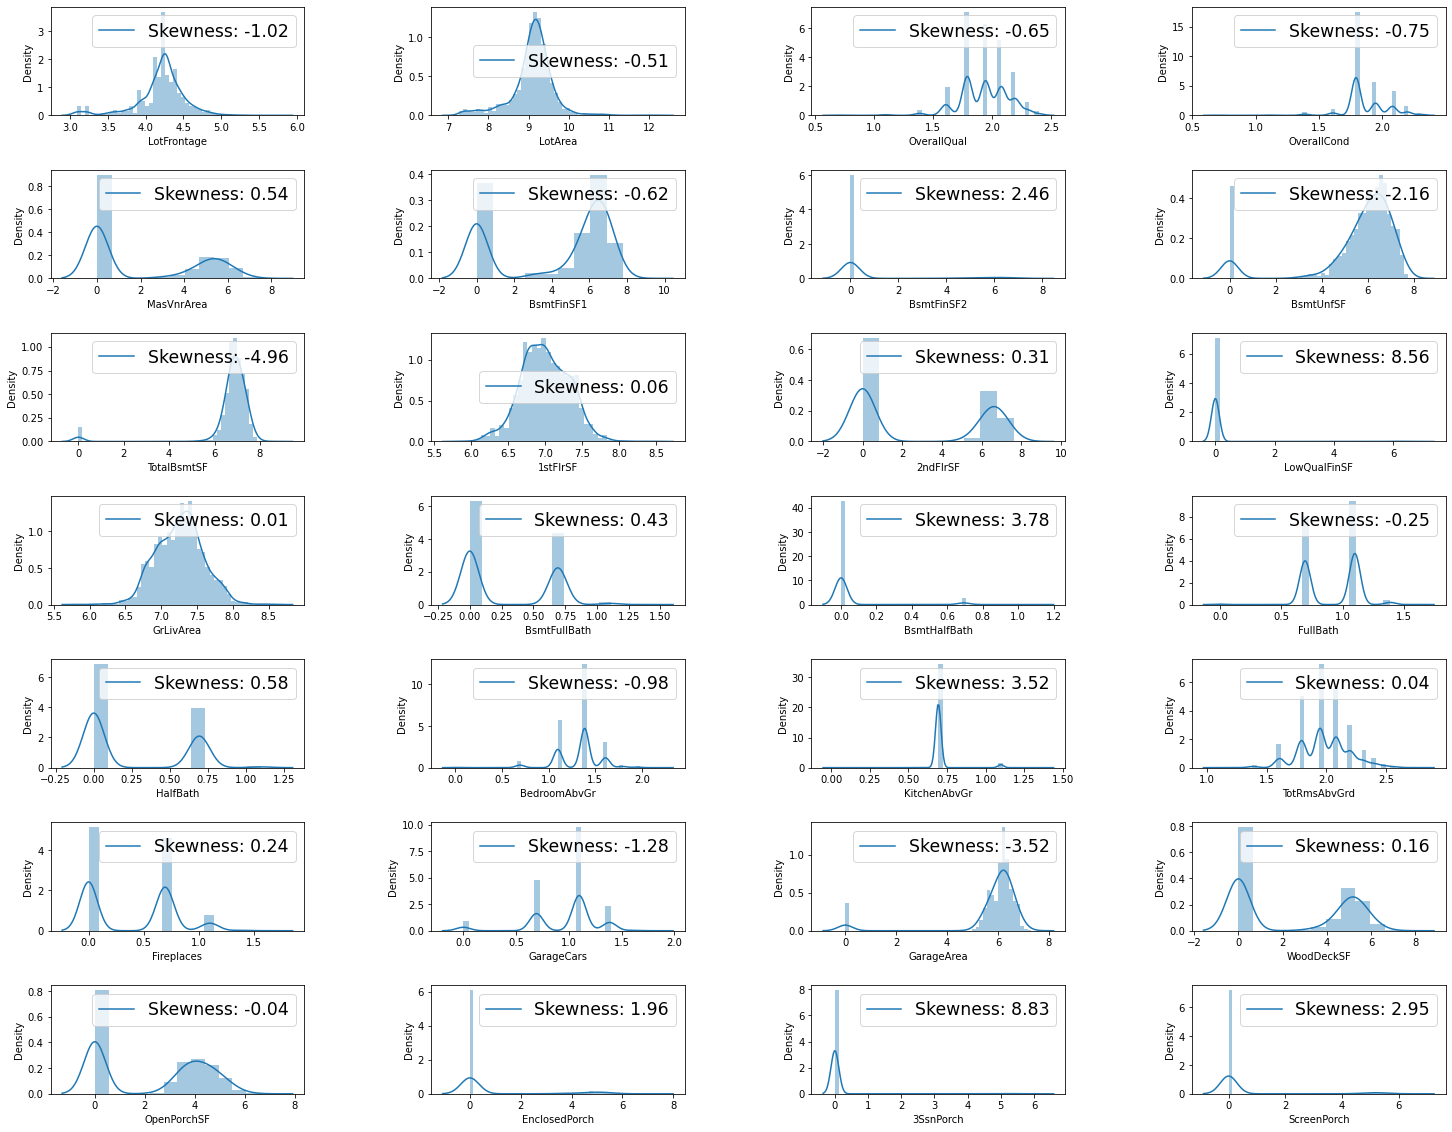

In [94]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i < 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')
        

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


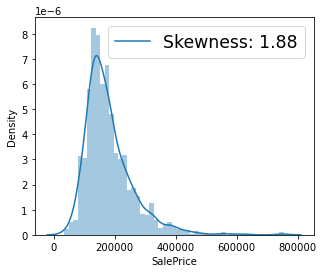

In [95]:
plt.figure(figsize=(5,4))
ax = sns.distplot(train['SalePrice'])
ax.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())], fontsize = 'xx-large')

In [96]:
# decrease skewness of 'Target'
SalePrice = np.log(train['SalePrice'] + 1)

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


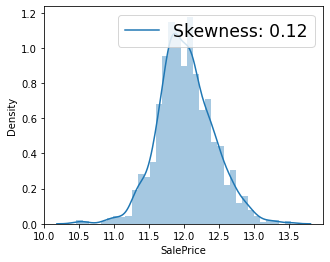

In [97]:
plt.figure(figsize=(5,4))
ax = sns.distplot(SalePrice)
ax.legend(["Skewness: {:.2f}".format(SalePrice.skew())], fontsize = 'xx-large')

In [98]:
# object feature to convert into numeric with dummy variable
obj_col = list(df.loc[:,df.dtypes=='object'].columns.values)
len(obj_col)

29

In [99]:
dummy_drop = []
for i in obj_col:
    dummy_drop += [i + '_'+str(df[i].unique()[-1])]
    
df = pd.get_dummies(df,columns=obj_col)
df = df.drop(dummy_drop,axis=1)

In [100]:
# df = df[high_corr_features.drop('SalePrice')]

In [101]:
df.shape

(2919, 498)

In [102]:
# sns.pairplot(df)

In [103]:
df2 = df

In [104]:
df[:len(train)].shape,train['SalePrice'].shape

((1460, 498), (1460,))

In [105]:
# Data spliting
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[:len(train)],train['SalePrice'],test_size=0.21,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1153, 498), (307, 498), (1153,), (307,))

In [106]:
# Data spliting
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df[:len(train)],train['SalePrice'],test_size=0.21,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1153, 498), (307, 498), (1153,), (307,))

#### Feature Scaling with diffirent types of Scaler

In [107]:
# feature scaling with robust scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(x_train)

x_train_rb = scaler.transform(x_train)
x_test_rb = scaler.transform(x_test)

In [108]:
# minmax scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)

x_train_mms = mms.transform(x_train)
x_test_mms = mms.transform(x_test)

In [109]:
# standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


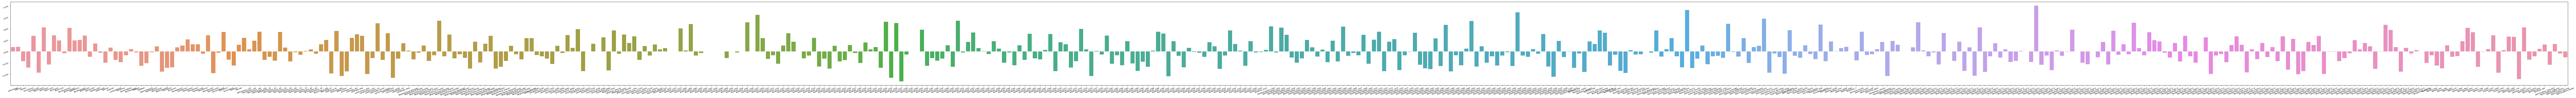

In [110]:
# features correlation
plt.figure(figsize=(180,6))

x = df[:len(train)]
y = x.corrwith(y_train)
ax = sns.barplot(x.columns,y)
ax.tick_params(labelsize=7,labelrotation=20,color='g')

# Machine Learning Model Building

In [271]:
# create a function for each regresser type with hyperparameter tuning
from sklearn.metrics import r2_score ,mean_squared_error
def model(estimator,x_train,y_train,x_test,y_test):
    model_estimator = estimator
    model_estimator.fit(x_train,y_train)
    y_pred = model_estimator.predict(x_test)
#     print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
    print('R2 Score : ',r2_score(y_test,y_pred))

#  Cross Validation

In [112]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def model_test(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model_test(lr),model(lr,x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  -2.4269717414162956e+20


([-4.974793796246074e+20], None)

In [272]:
model(lr,x_train,y_train,x_test,y_test)

R2 Score :  -4.180569096657257e+19


In [115]:
# cross validation
cross_validation = cross_val_score(estimator = lr,X=x_train,y=y_train,cv=10)
print('cross validation accuracy of lr model :',cross_validation)
print('\ncross validation Mean accuracy of lr model :',cross_validation.mean())

cross validation accuracy of lr model : [-2.85623260e+17 -8.68180084e+17 -2.17227681e+19 -2.45890096e+21
 -1.67770340e+18 -3.30201065e+21 -3.20715879e+19 -6.57631988e+19
 -3.94403819e+18 -2.66558165e+19]

cross validation Mean accuracy of lr model : -5.913900530781495e+20


# Ridge & Lasso

In [116]:
from sklearn.linear_model import Ridge,Lasso

rdg = Ridge()
lso = Lasso(alpha=1e-4)

model_test(rdg)

[0.7301486574344458]

In [117]:
model_test(lso)

c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91697861892.48537, tolerance: 471781054.3385918
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114956031220.9511, tolerance: 472392808.9845766
  model = cd_fast.enet_coordinate_descent(
c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107051002917.52953, tolerance: 443304614.16253555
  model = cd_fast.enet_coordinate_descent(


[0.5107367119022713]

In [118]:
model(lso,x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.6761455851279212


c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232720288270.7294, tolerance: 694063530.1224891
  model = cd_fast.enet_coordinate_descent(


# SGDRegressor

In [119]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(penalty='l2')
model_test(sgdr)

[-0.07353447093378185]

In [273]:
model(sgdr,x_train_rb,y_train,x_test_rb,y_test)
model_test(sgdr)

R2 Score :  0.8363695883630933


[-378.5569795268341]

# Logistic regressor

In [121]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression()
model_test(log_re)

c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[0.3718314638084362]

In [122]:
model(log_re,x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.6391689904231298


c:\program files\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM Regression

In [123]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf',degree=2,C=100,epsilon=0.1)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
r2 = r2_score(y_test,y_pred)
model_test(svr)

[-0.021231821178602745]

In [124]:
model(SVR(kernel='rbf',C=500),x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.20999556503143968


In [125]:
model(SVR(kernel = 'rbf',degree=10,C=500,epsilon=0.1),x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.20999556503143968


# Decision Tree Regressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
model_test(dtr)

[0.645677955410313]

In [127]:
model(DecisionTreeRegressor(),x_train,y_train,x_test,y_test)

R2 Score :  0.7894776562805124


# Random Forest Regressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model_test(rfr)

[0.8222148313809151]

In [129]:
model(RandomForestRegressor(),x_train,y_train,x_test,y_test)

R2 Score :  0.8788575841240956


In [130]:
# hyperparameter tuning
model(RandomForestRegressor(n_estimators= 100,random_state=51),x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.8918475230416903


In [131]:
model(RandomForestRegressor(n_estimators= 100),x_train_mms,y_train,x_test_mms,y_test)

R2 Score :  0.8877479547006086


In [132]:
model(RandomForestRegressor(n_estimators= 100,random_state=51),x_train_sc,y_train,x_test_sc,y_test)

R2 Score :  0.8918709663234937


# Bagging & Boosting Regressor

In [133]:
from sklearn.ensemble import BaggingRegressor , GradientBoostingRegressor
bag_r = BaggingRegressor()
gb_r  = GradientBoostingRegressor()

model_test(bag_r)

[0.7943139887076563]

In [134]:
model_test(gb_r)

[0.8184149323577992]

In [135]:
model(BaggingRegressor(n_estimators=100,random_state=51),x_train,y_train,x_test,y_test)

R2 Score :  0.8905825732799927


In [136]:
model(BaggingRegressor(n_estimators=100,random_state=51),x_train_sc,y_train,x_test_sc,y_test)

R2 Score :  0.8906651700456797


In [137]:
model(GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,loss='ls',random_state=51),x_train_rb,y_train,x_test_rb,
      y_test)

R2 Score :  0.8883110436673299


# XGBoost

In [138]:
# from xgboost import XGBRegressor

# xgb = XGBRegressor(bbooster='gbtree', random_state=51)
# model_test(xgb)

In [139]:
# using pca
from sklearn.decomposition import PCA

In [140]:
pca = PCA()
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [141]:
model(RandomForestRegressor(n_estimators=100),x_train_pca,y_train,x_test_pca,y_test)

R2 Score :  0.6478763181381164


we have reached to 89% accuracy of bagging regressor or random forest regressor but we need to improve them and this process will never stop until and unless app not stop.

hyperparameter tuning of model for getting best accuracy=>

## Random Forest Regressor Hyperparameter tuning

In [142]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=None,
...     min_samples_split=2, random_state=42)
model_test(rfr)

[0.8221751693690171]

In [143]:
model(rfr,x_train_sc,y_train,x_test_sc,y_test)

R2 Score :  0.8829447369508211


In [144]:
score = cross_val_score(rfr,x_train_sc,y_train,cv=5)
score.mean()

0.8389667567397785

# KNeighbors Regressor

In [145]:
from sklearn.neighbors import KNeighborsRegressor

In [146]:
kn_reg = KNeighborsRegressor(n_neighbors=10,weights='distance',algorithm='ball_tree',leaf_size=3)
model_test(kn_reg)

[0.5366187874029102]

In [147]:
score = cross_val_score(kn_reg,x_train_rb,y_train,cv=10)
score.mean()

0.7071867124957232

In [274]:
model(kn_reg,x_train_rb,y_train,x_test_rb,y_test)

R2 Score :  0.7555828839648642


# SVM Hyperparameter Tuning

In [149]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [151]:
svr_reg = SVR()
params = {
    'kernel':['rbf','poly','linear'],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'C':[0.1,1,10,100,1000],
    'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001],
    'max_iter':[100,1000,2000,2500],
    'coef0':[1]
}

rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=1, cv=11)
rand_search.fit(x_train,y_train)
rand_search.best_score_

c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\program files\python38-32\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

0.6808548452745543

In [152]:
rand_search.best_params_

{'max_iter': 100,
 'kernel': 'linear',
 'gamma': 1,
 'epsilon': 1,
 'coef0': 1,
 'C': 1000}

In [153]:
rand_search.best_estimator_

SVR(C=1000, coef0=1, epsilon=1, gamma=1, kernel='linear', max_iter=100)

In [154]:
svr_reg.get_params().keys()

# dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

## Random Forest Regressor Model Building

In [155]:
df['YearRemodAdd_1953'].unique()

array([0, 1], dtype=uint8)

In [156]:
# predict now
test_set = df[len(test)+1:]

In [168]:
# standard scaler
sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
test_set_sc = sc.transform(test_set)

In [172]:
test.shape,test_set.shape

((1459, 80), (1459, 498))

In [173]:
rfr = RandomForestRegressor(n_estimators=100, random_state=51)
rfr.fit(x_train_sc,y_train)

y_pred = rfr.predict(x_test_sc)
score = r2_score(y_test,y_pred)
score

0.8918709663234937

In [215]:
for i in range(0,y_pred.shape[0]):
    print((y_test.values[i]),' : ',y_pred[i])

154500  :  140630.37
325000  :  322937.48
115000  :  117907.75
159000  :  157867.85
315500  :  310789.81
75500  :  88074.0
311500  :  206935.39
146000  :  153076.9
84500  :  85982.0
135500  :  128477.5
145000  :  154609.97
130000  :  122086.5
81000  :  106318.0
214000  :  204916.7
181000  :  176363.82
134500  :  128091.25
183500  :  195261.1
135000  :  133222.0
118400  :  119235.5
226000  :  207010.16
155000  :  155239.0
210000  :  218136.99
173500  :  174713.48
129000  :  120871.5
192000  :  196747.7
153900  :  174297.54
181134  :  180361.22
141000  :  108439.0
181000  :  181072.43
208900  :  195217.14
127000  :  125823.01
284000  :  250365.14
200500  :  163105.62
135750  :  115996.59
255000  :  257160.92
140000  :  146830.58
138000  :  137267.05
219500  :  202175.07
310000  :  308104.57
97000  :  107961.16
114500  :  124929.0
205000  :  235706.73
119500  :  118279.33
253293  :  369414.86
128500  :  138163.15
117500  :  146578.4
115000  :  115422.66
127000  :  128040.6
451950  :  3959

In [247]:
# predict the test set
y_pred_test = rfr.predict(test_set_sc)

for i in y_pred_test:
    print(i)

128088.83
165339.51
172535.74
185910.67
208332.48
183946.55
169221.15
176712.7
179683.05
121348.0
201033.05
90996.5
103909.5
154493.0
147052.85
353680.09
251611.62
292649.28
245663.96
420794.79
299546.78
205971.92
176739.29
175761.98
171572.78
195476.0
330003.77
246431.61
197049.5
191987.31
193949.5
101189.33
180342.0
294256.51
296450.65
215984.55
192777.33
152922.53
151938.51
154201.93
168917.0
166302.9
303247.37
230991.0
216624.25
190454.37
231095.54
207740.78
165825.35
152733.55
152380.32
163072.8
166983.96
157057.89
171925.0
169114.0
150779.74
134695.79
218396.8
138742.05
145457.05
167363.8
111506.0
124495.8
125499.32
126064.0
108635.55
123961.0
148099.62
164628.32
139449.5
106507.0
150942.0
119334.54
161428.68
127193.0
84610.5
186204.7
236494.79
113767.53
153032.8
137717.18
206897.72
80495.0
104848.0
129372.82
129100.0
130381.54
121059.6
143028.37
121765.0
144919.56
148998.89
108458.9
179008.0
99533.37
131381.25
94927.95
120940.13
152096.53
152219.37
119743.47
123387.0
163685.67
1

227350.46
212235.5
284711.94
234194.95
226786.01
239132.35
137829.12
197617.71
210399.88
190766.92
195206.36
137121.89
125848.5
137269.5
191889.38
120181.83
260370.3
141841.18
134017.0
104003.5
125859.17
125635.29
158291.37
103539.0
68143.0
103439.54
145779.92
117627.09
154677.5
149441.61
163541.9
149433.05
104341.12
158478.14
162261.95
166583.5
180244.62
190363.86
192655.24
109605.0
135199.4
66712.0
94066.0
146528.77
62196.0
108598.46
67107.5
326867.9
292453.67
197874.7
160118.86
239000.07
160141.77
197651.11
182850.19
356653.88
343493.32
122228.79
195378.3
114520.93
126559.5
142825.55
84902.0
89134.0
151522.62
91069.83
91968.0
91762.0
90164.0
161837.11
115946.25
219844.54


# Model Save or Load

In [249]:
# using pickle
import pickle

In [251]:
# save your model
pickle.dump(rfr,open('model_house_price_prediction.pkl','wb'))

In [277]:
# load model
model = pickle.load(open('model_house_price_prediction.pkl','rb'))
pred = model.predict(x_test_sc)
r2_score(y_test,pred).mean()

0.8918709663234937

In [259]:
for i in pred:
    print(i)

140630.37
322937.48
117907.75
157867.85
310789.81
88074.0
206935.39
153076.9
85982.0
128477.5
154609.97
122086.5
106318.0
204916.7
176363.82
128091.25
195261.1
133222.0
119235.5
207010.16
155239.0
218136.99
174713.48
120871.5
196747.7
174297.54
180361.22
108439.0
181072.43
195217.14
125823.01
250365.14
163105.62
115996.59
257160.92
146830.58
137267.05
202175.07
308104.57
107961.16
124929.0
235706.73
118279.33
369414.86
138163.15
146578.4
115422.66
128040.6
395922.06
147702.84
122687.5
193875.0
114702.21
366927.06
138640.0
240115.71
197058.28
150223.55
143532.0
108959.0
77288.0
147150.25
305634.3
283808.04
279623.57
213800.27
110714.0
306551.9
109125.0
164929.28
125069.78
127936.25
112695.5
91863.0
450490.14
178165.37
308978.51
302858.69
142177.0
126502.0
98712.54
102761.0
130293.5
101394.33
154173.47
132889.18
259704.68
200367.69
141113.0
181003.25
139605.82
155928.42
122859.0
265051.89
117801.92
174763.69
163102.1
162012.75
215472.15
246627.3
174220.5
212258.29
296538.3
141919.22
1962

Project End:
if i need more accuracy then i need best features so feature selection is the most important part of the machine learning.
carefully observe every feature and extract usefull features.Train your model ,improve accuracy,test him and Diploy your model.
This Project is ready for Diployment.

# Project End